# Numerical Results for the A+B→C Network

### Compare Gillespie simulation with mass action kinetics and Plefka approximation

In [1]:
using Pkg
cd(@__DIR__)
Pkg.activate("../../")
using CRN

include("plotting.jl")

 Activating environment at `~/ownCloud/Master/Simulations/CRN/Project.toml`
┌ Info: Precompiling CRN [da75a55d-9cc8-480a-9f60-a17664246748]
└ @ Base loading.jl:1260


plot_hatTheta (generic function with 1 method)

In [2]:
# Parameters
num_species = 3     # number of species
num_int = 1         # number of interaction reaction

# Reaction constants
k1 = [8, 8, 3]      # Creation
k2 = [3, 2, 1.5]    # Annihiliation
k3 = [0.5]          # Interaction
k = [k1, k2, k3]

# Stoichiometric
s_i = zeros(Int, num_int, num_species)
r_i = copy(s_i)
s_i[1,:] = [0 0 1]
r_i[1,:] = [1 1 0]

# Times
t_init = 0.0        # Start time
t_final = 5.0       # End time
delta_t = 0.01      # time step
tspan = collect(t_init:delta_t:t_final)

# Initial condition
x0 = k1 ./ k2

3-element Array{Float64,1}:
 2.6666666666666665
 4.0
 2.0

## Gillespie Simulation

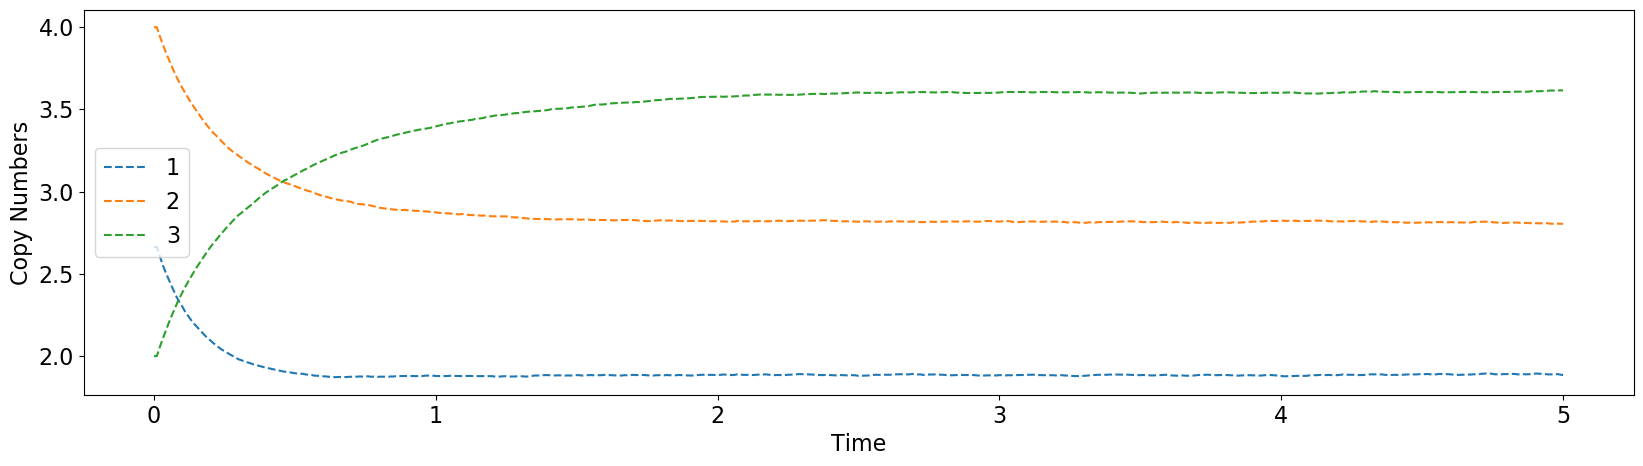

  6.890785 seconds (78.90 M allocations: 11.836 GiB, 12.65% gc time)


PyObject Text(32.999999999999986, 0.5, 'Copy Numbers')

In [3]:
N = 100000    # Repititions
res_gil = @time gillespie_avg(x0, k, s_i, r_i, tspan, N)
plot_trajectories(res_gil)

## Mass Action Kinetics

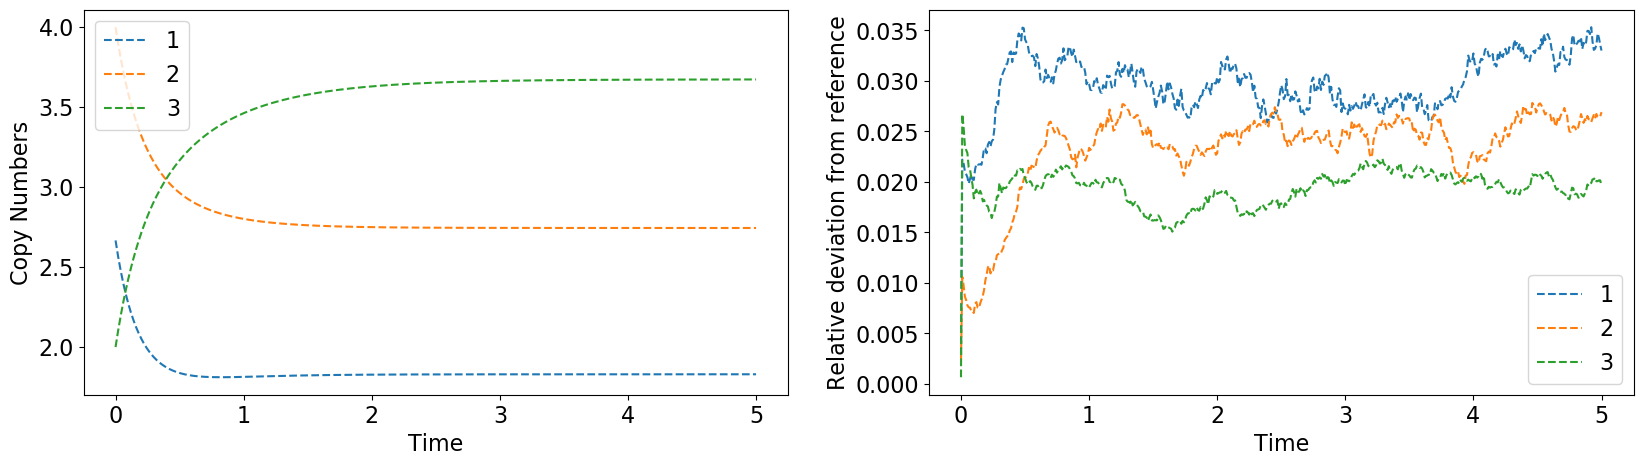

PyObject Text(850.2045454545454, 0.5, 'Relative deviation from reference')

In [13]:
function f_massAction!(du,u,k,t)
    du[1] = k1[1] - k2[1]*u[1] - k3[1]*u[1]*u[2]
    du[2] = k1[2] - k2[2]*u[2] - k3[1]*u[1]*u[2]
    du[3] = k1[3] - k2[3]*u[3] + k3[1]*u[1]*u[2]
end

ts = (tspan[1], tspan[end])
res_ma = ode_solver(f_massAction!, k, ts, x0)
plot_trajectories_and_deviation(res_ma, res_gil)

## Plefka with linear O.P. and power α¹ 

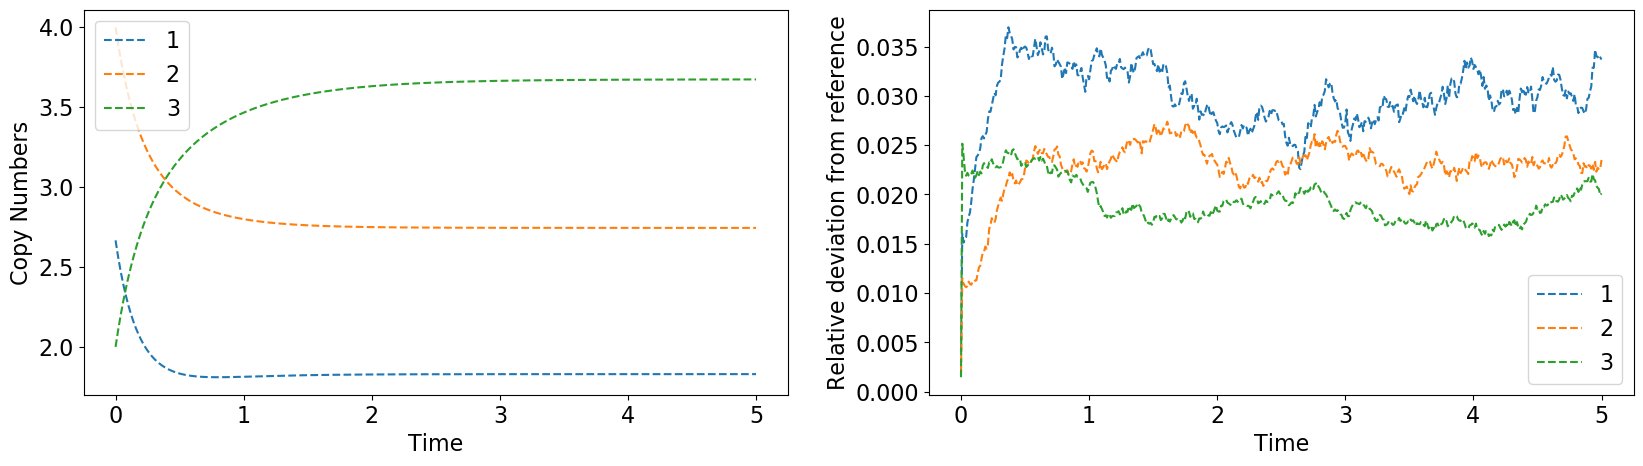

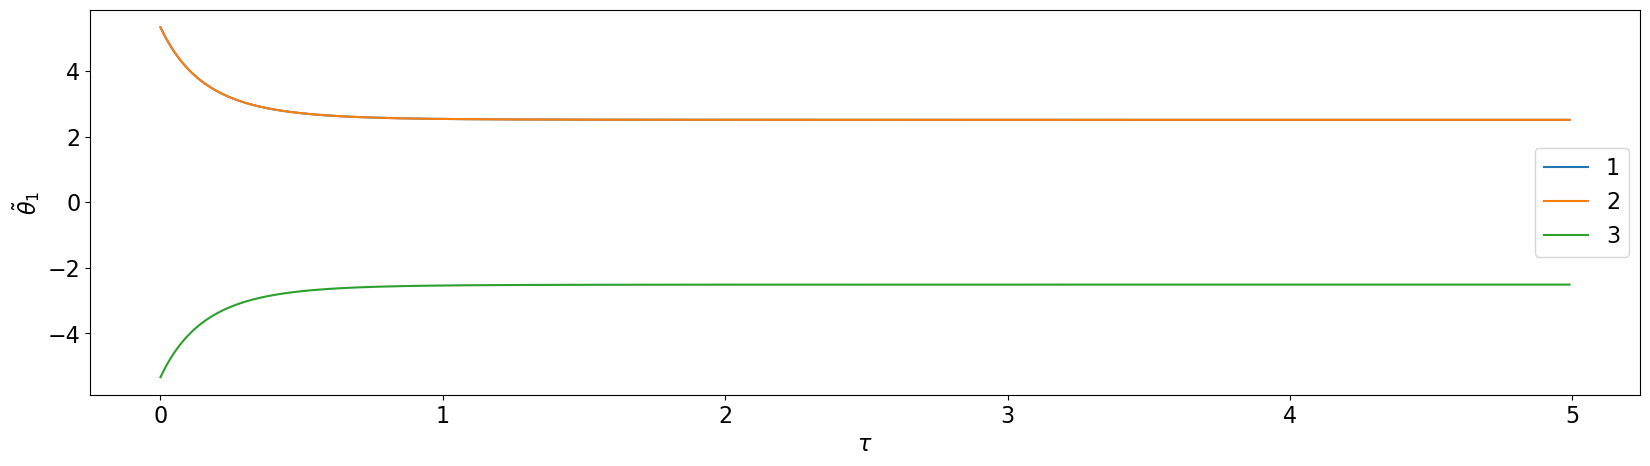

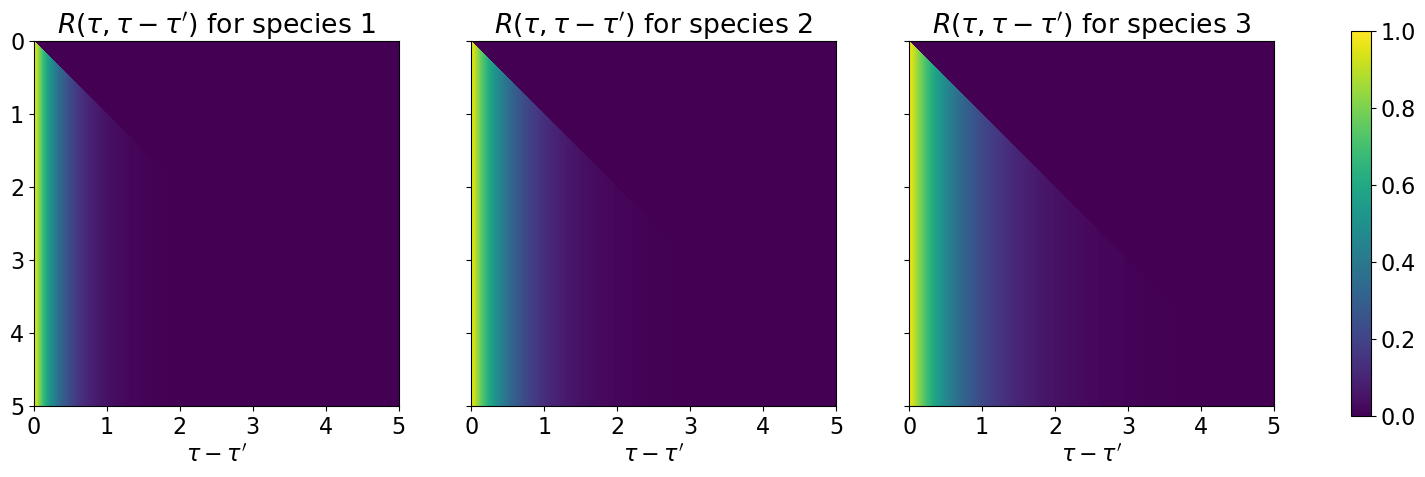

In [7]:
plf_sim_11 = Plefka(1.0, 1, "linear") # α, alphaOrder, orderParameter
res_plf_11 = euler_step(x0, k, tspan, plf_sim_11)
plot_trajectories_and_deviation(res_plf_11[1], res_gil)
plot_hatTheta(plf_sim_11, res_plf_11[3])
plot_responses(res_plf_11[2])

## Plefka with linear O.P. and power α²

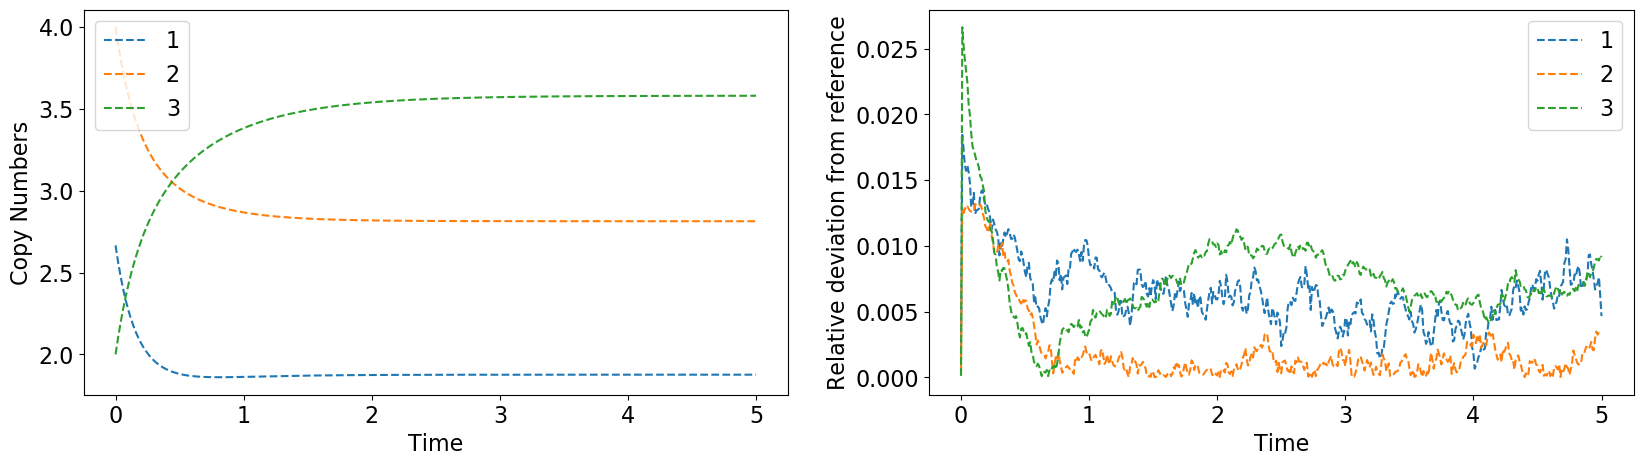

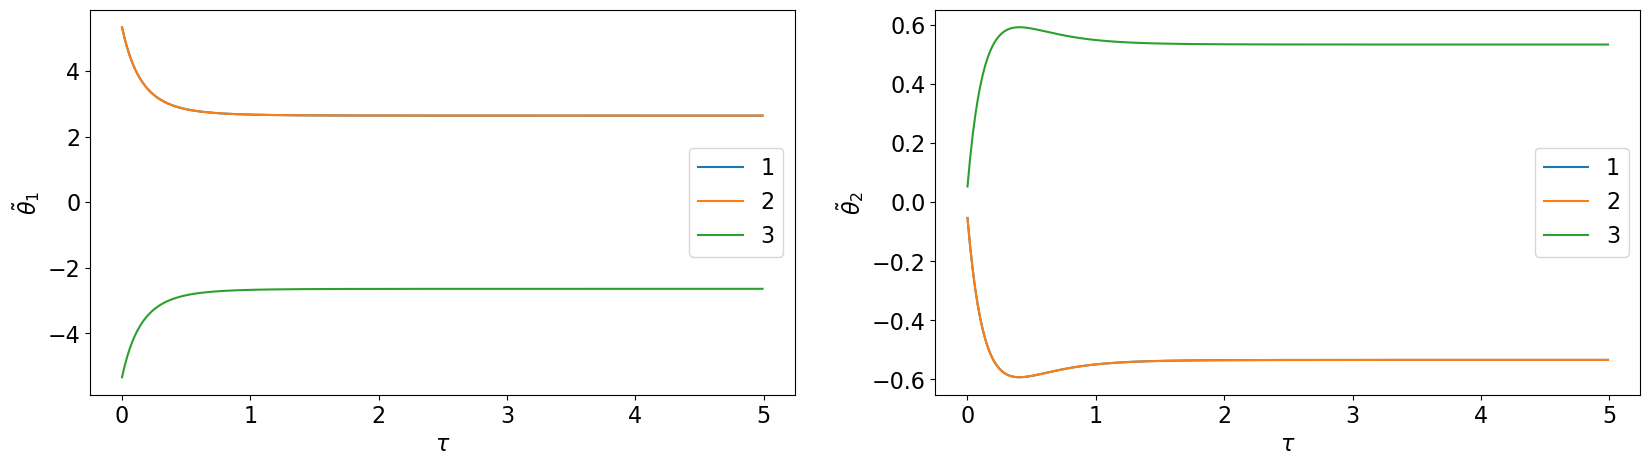

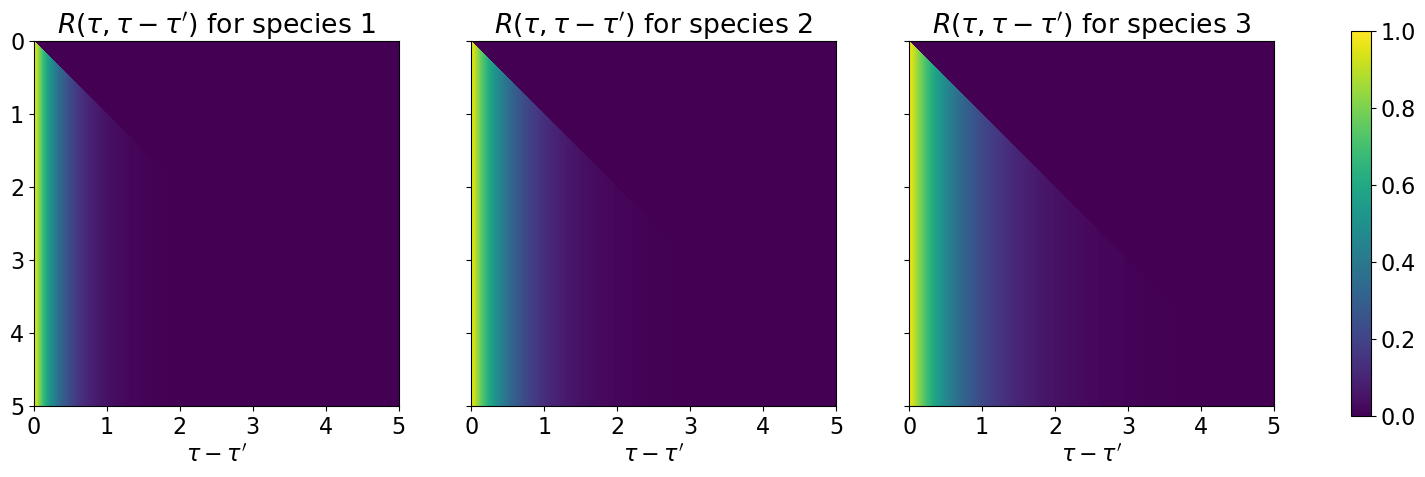

In [7]:
plf_sim_21 = Plefka(1.0, 2, "linear") # α, alphaOrder, orderParameter
res_plf_21 = euler_step(x0, k, tspan, plf_sim_21)
plot_trajectories_and_deviation(res_plf_21[1], res_gil)
plot_hatTheta(plf_sim_21, res_plf_21[3])
plot_responses(res_plf_21[2])

## Plefka with quad O.P. and power α¹ 

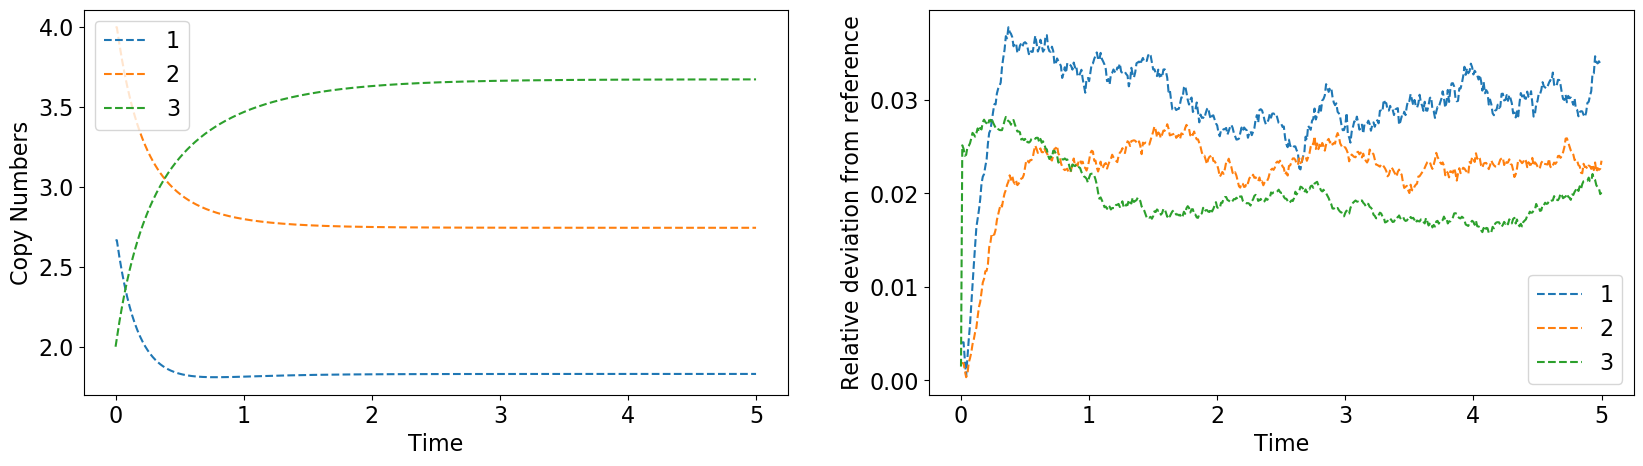

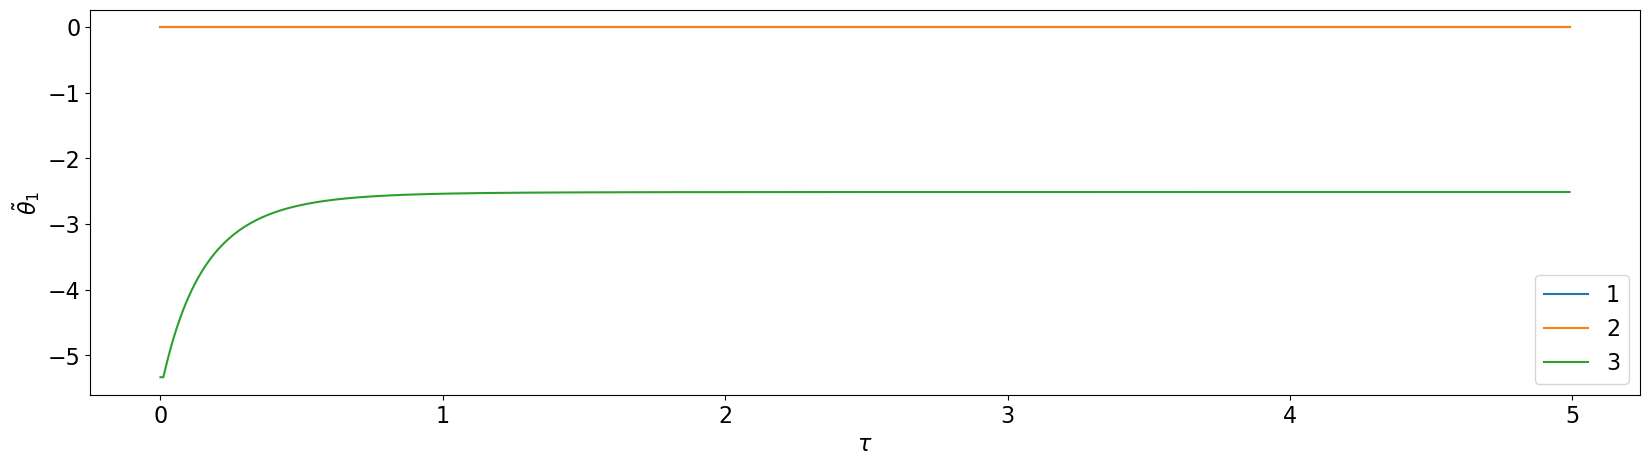

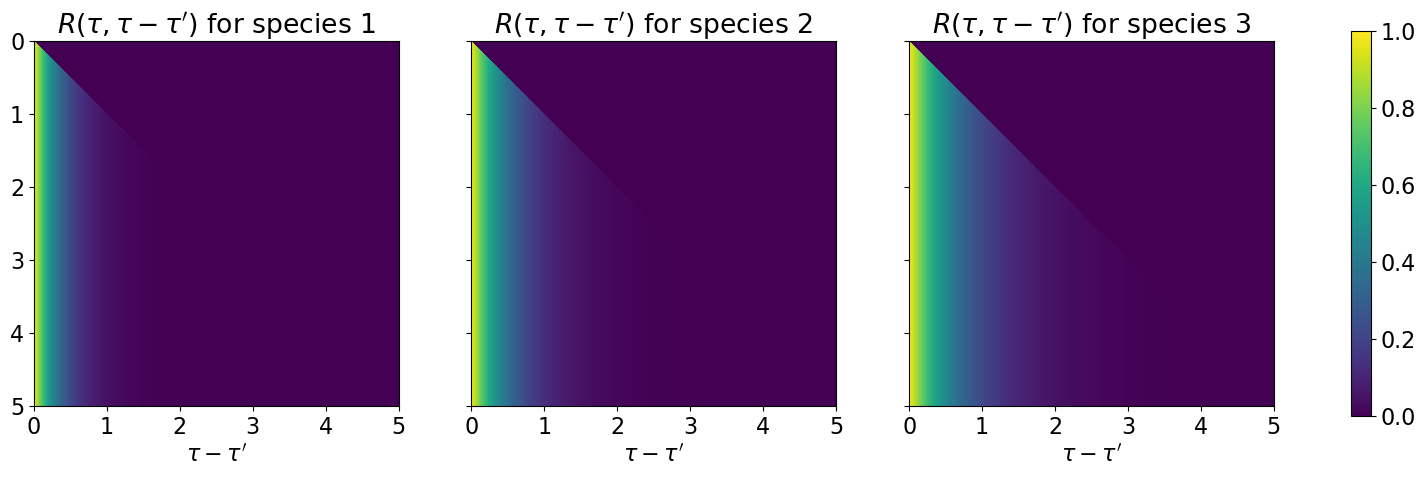

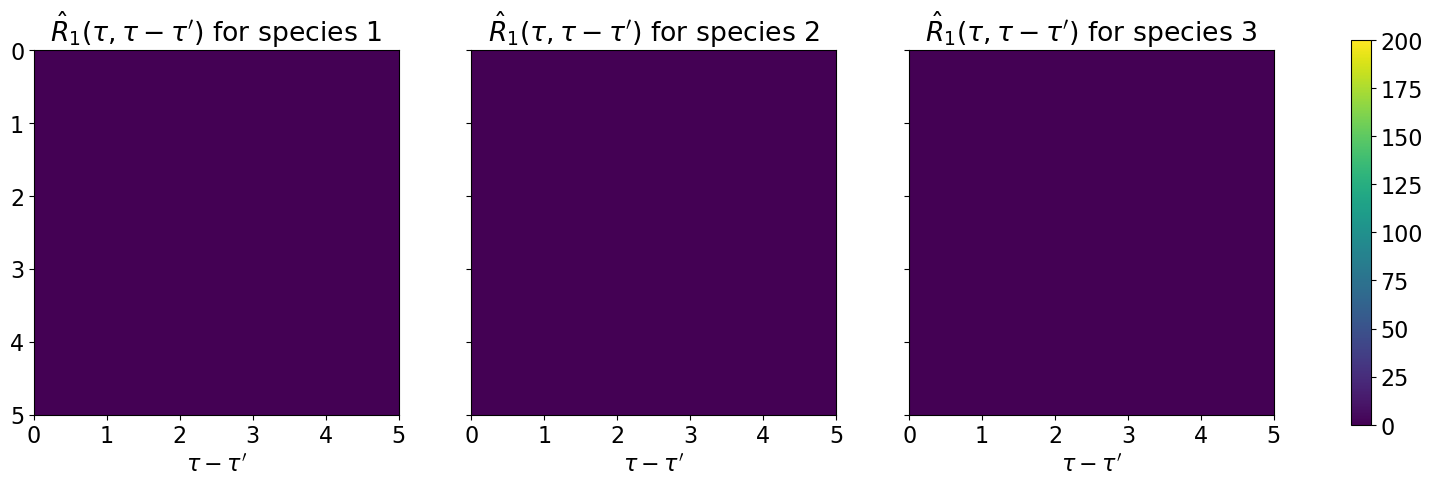

In [6]:
plf_sim_12 = Plefka(1.0, 1, "quad") # α, alphaOrder, orderParameter
res_plf_12 = euler_step(x0, k, tspan, plf_sim_12)
plot_trajectories_and_deviation(res_plf_12[1], res_gil)
plot_hatTheta(plf_sim_12, res_plf_12[3])
plot_responses(res_plf_12[2])
plot_hatR(plf_sim_12, tspan, res_plf_12[3].hatR1)

## Plefka with quad O.P. and power α²

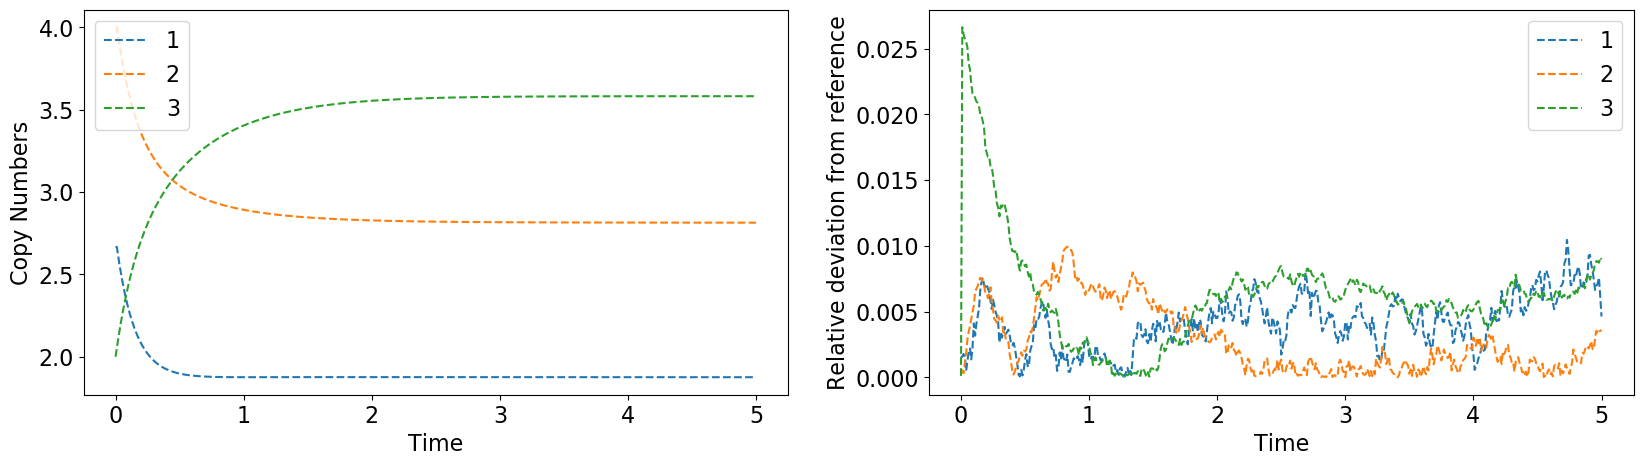

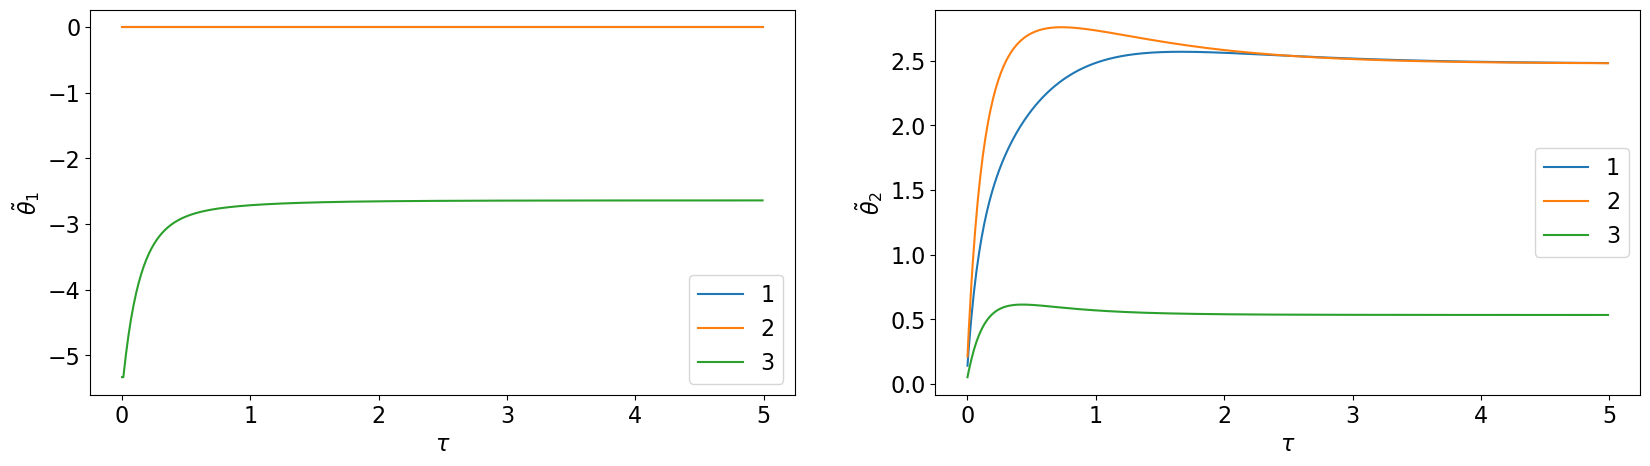

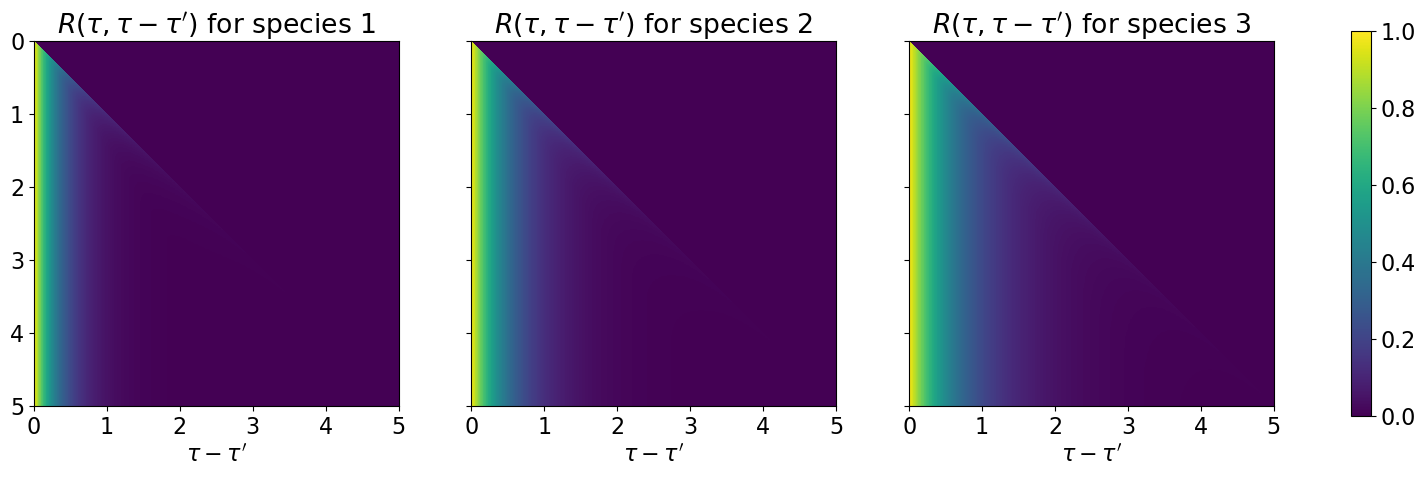

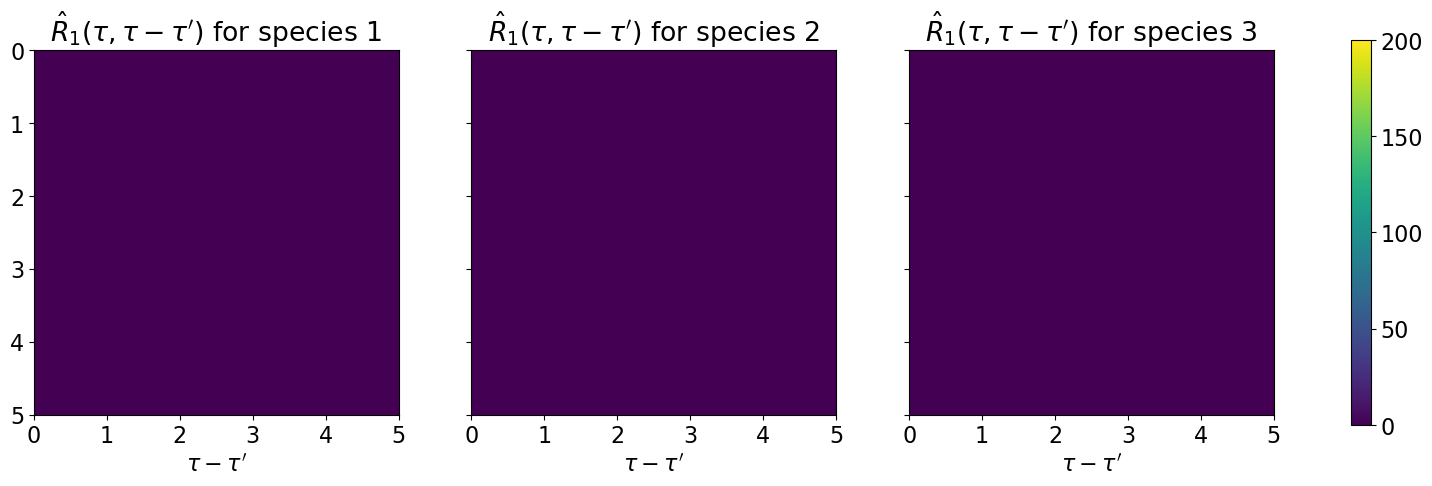

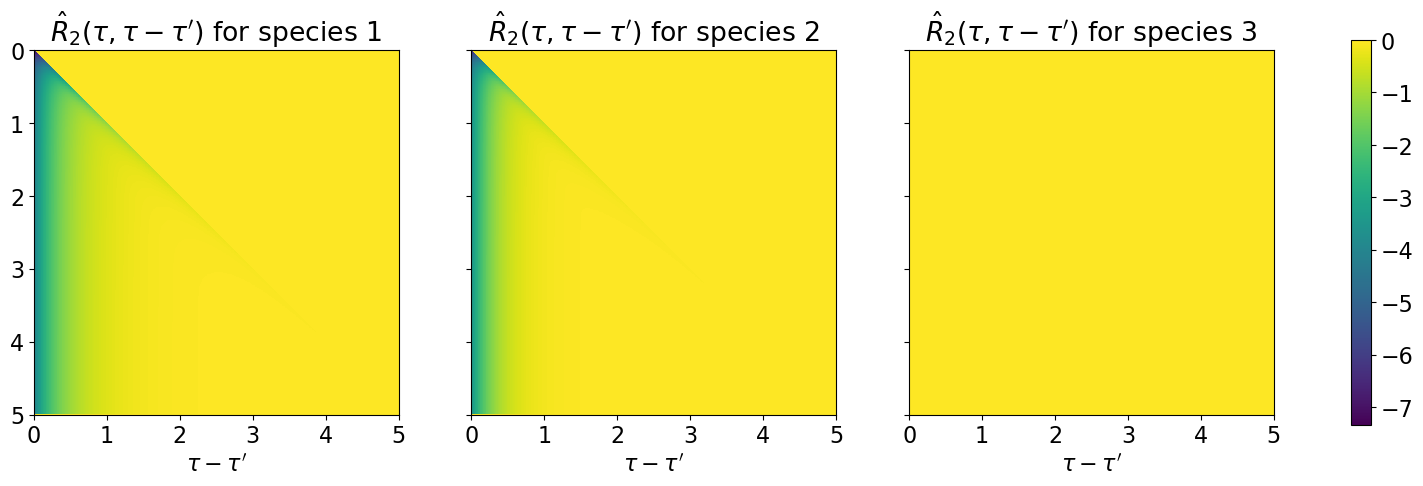

In [4]:
plf_sim_22 = Plefka(1.0, 2, "quad") # α, alphaOrder, orderParameter
res_plf_22 = euler_step(x0, k, tspan, plf_sim_22)
plot_trajectories_and_deviation(res_plf_22[1], res_gil)
plot_hatTheta(plf_sim_22, res_plf_22[3])
plot_responses(res_plf_22[2])
plot_hatR(plf_sim_22, tspan, res_plf_22[3].hatR1)
plot_hatR(plf_sim_22, tspan, res_plf_22[3].hatR2, quadR=true)

In [17]:
# Comments:
# - (l.319) update hatR1 with y[:,self.i-1] for i=0 ???
# - (l.55) reaction prob vector with y[k,i]**r_i[m,k]
# - deviation first time step: large jump ???
# - ignore last time step for hatTheta ???

# TODOs
# - better arrangement of subplots

In [22]:
res_gil.data

3×501 Array{Float64,2}:
 2.67436  2.67436  2.62372  2.57512  …  1.89554  1.89463  1.8933   1.89219
 3.99033  3.99033  3.93723  3.88562     2.81913  2.81892  2.81928  2.82048
 1.9987   1.9987   2.04953  2.09952     3.60112  3.60085  3.60088  3.60275

In [19]:
x0

3-element Array{Float64,1}:
 2.6666666666666665
 4.0
 2.0

In [20]:
res_ma.data

3×501 Array{Float64,2}:
 2.66667  2.61498  2.56645  2.52087  …  1.82974  1.82974  1.82974  1.82974
 4.0      3.94806  3.89878  3.85199     2.74459  2.74459  2.74459  2.74459
 2.0      2.05207  2.10173  2.14913     3.6734   3.67341  3.67342  3.67343

In [23]:
res_plf_11[1].data

3×501 Array{Float64,2}:
 2.66667  2.61333  2.56336  2.51653  …  1.82971  1.82971  1.82971  1.82971
 4.0      3.94667  3.89616  3.8483      2.74457  2.74457  2.74457  2.74457
 2.0      2.05333  2.1041   2.15248     3.67345  3.67346  3.67347  3.67348

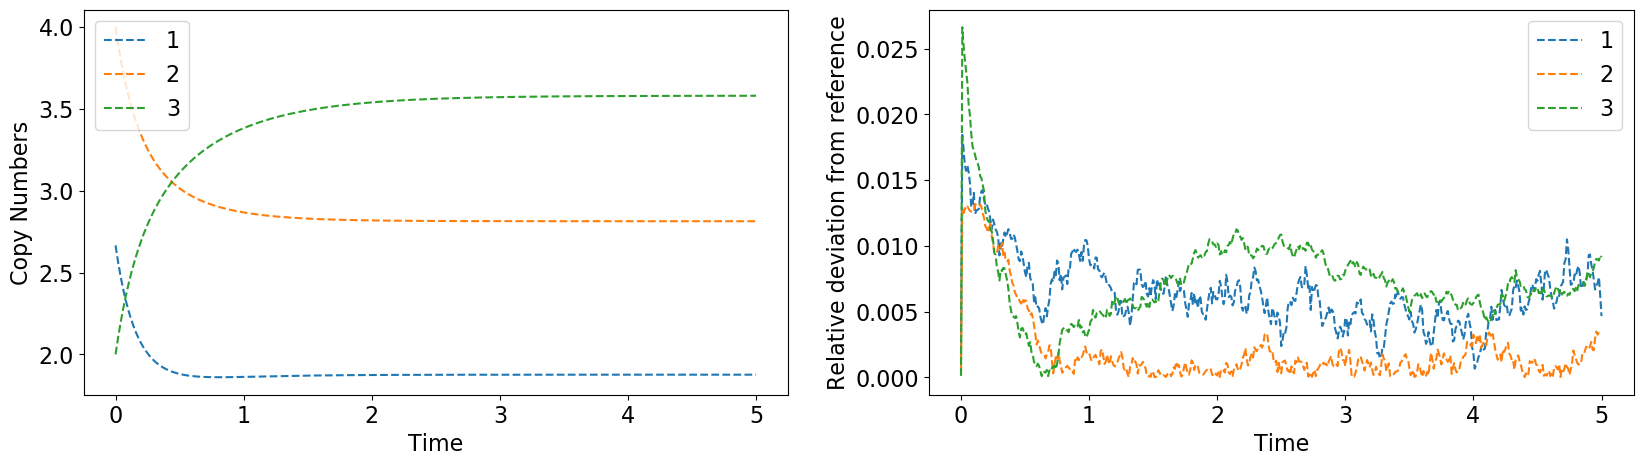

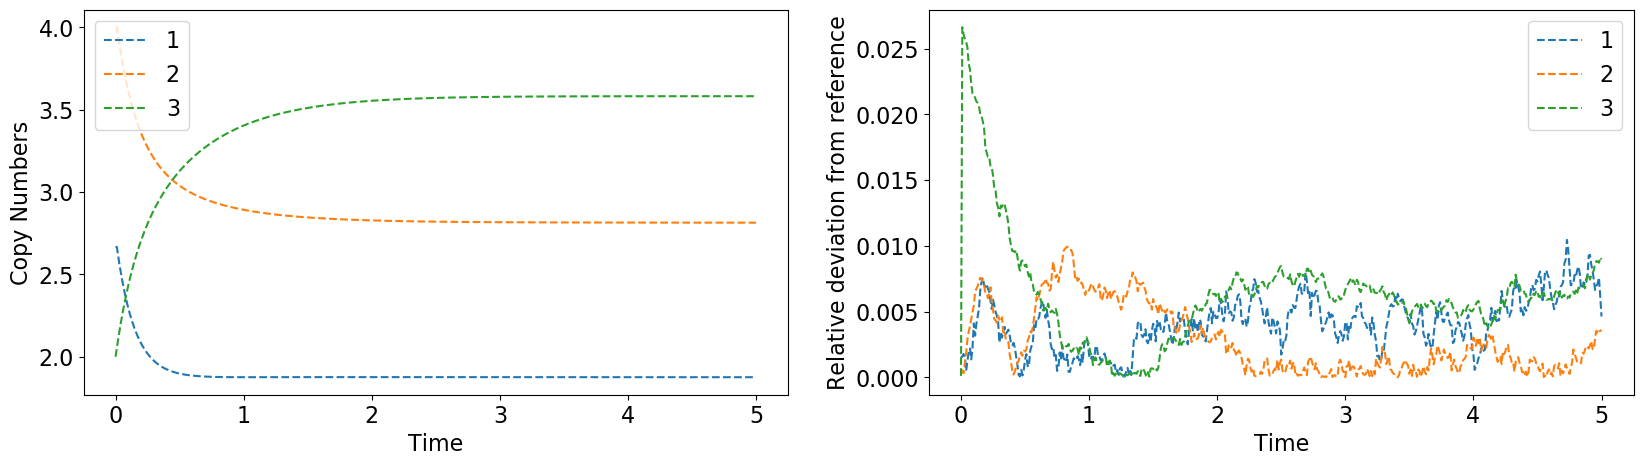

PyObject Text(850.2045454545454, 0.5, 'Relative deviation from reference')

In [8]:
plot_trajectories_and_deviation(res_plf_21[1], res_gil)
plot_trajectories_and_deviation(res_plf_22[1], res_gil)

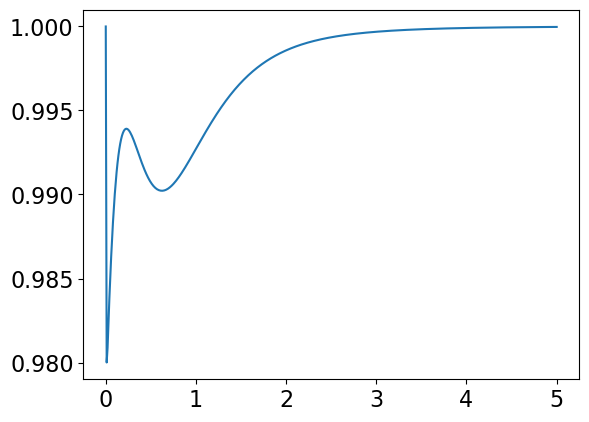

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff2539c0ac0>

In [14]:
r = res_plf_21[1].data[1,:] ./ res_plf_22[1].data[1,:]
plot(tspan, r)

In [16]:
res_plf_22[1].data[1,:]

501-element Array{Float64,1}:
 2.6666666666666665
 2.666933333333333
 2.6141123254337777
 2.5631099324771607
 2.5156358427206986
 2.471493986226055
 2.430441207158241
 2.3922513332660666
 2.356716522581826
 2.323645167542486
 2.2928601061244027
 2.264198345893375
 2.237509218658161
 ⋮
 1.8759880556438246
 1.8759874303362756
 1.8759868117223264
 1.8759861997317224
 1.8759855942929506
 1.8759849953531922
 1.8759844028440091
 1.875983816695824
 1.8759832368567473
 1.8759826632601269
 1.8759820958382807
 1.8759815345402655